In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

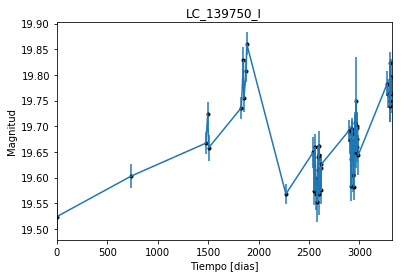

In [26]:
data = np.genfromtxt('LC_139750_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_139750_I')
plt.savefig("LC_139750_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

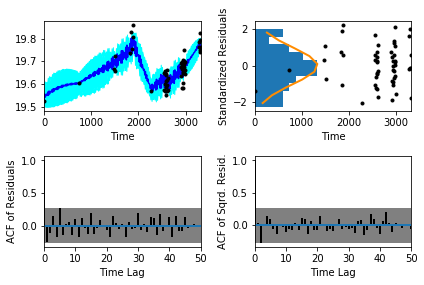

In [5]:
sample.assess_fit()

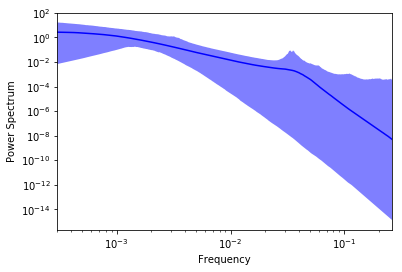

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

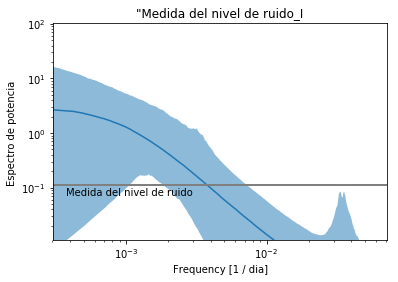

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_139750_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_139750_I')

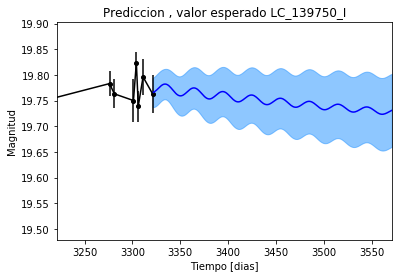

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_139750_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_139750_I')

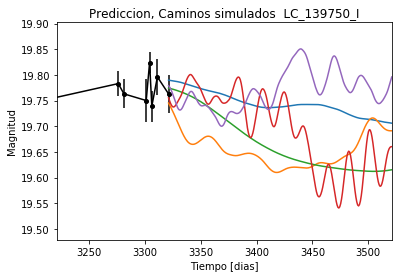

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_139750_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


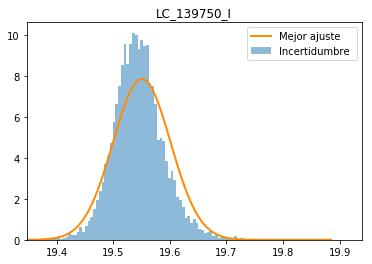

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_139750_I')
plt.savefig("Mejor_ajuste_LC_139750_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_139750_I')

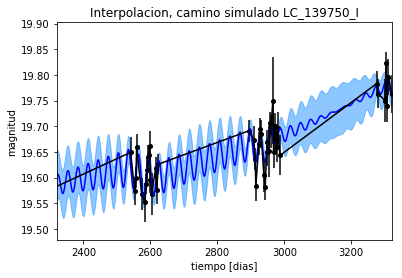

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_139750_I')

Text(0.5,1,'Interpolacion, camino simulado LC_139750_I')

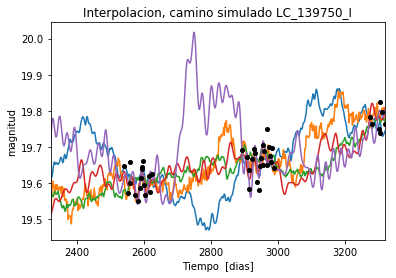

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_139750_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 796.154974793
Median: 0.00448095115504
Standard deviation: 0.0704768266883
68% credibility interval: [ 0.0008038   0.03794485]
95% credibility interval: [ 0.00036393  0.27604713]
99% credibility interval: [  3.16012708e-04   4.41271678e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 929.170830522
Median: 0.00335338435093
Standard deviation: 0.0415847739393
68% credibility interval: [ 0.00060997  0.01979272]
95% credibility interval: [ 0.00035     0.13213526]
99% credibility interval: [ 0.00031107  0.29589374]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 566.796839681
Median: 0.0206345480622
Standard deviation: 0.12699

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 255.234774026
Median: 110.824485425
Standard deviation: 2.39495279961
68% credibility interval: [ 108.62889952  113.57517494]
95% credibility interval: [ 106.21298029  115.19819257]
99% credibility interval: [ 104.16843494  115.66811491]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 495.209975321
Median: 0.343262578241
Standard deviation: 1.07238543632
68% credibility interval: [ 0.06275345  1.81593289]
95% credibility interval: [ 0.01678675  3.60133188]
99% credibility interval: [ 0.00997719  5.40984363]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 929.009443256
Median: 0.129539295655
Standard deviation: 2.48460123533
68% credibility interval: [ 0.04198196  2.86520608]
95% credibility interval: [  8.55749208e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 440.611861446
Median: 3.7400921185e-22
Standard deviation: 1.3436948431e+133
68% credibility interval: [  2.26946279e-97   2.10427523e+59]
95% credibility interval: [  1.36576816e-166   3.70436180e+119]
99% credibility interval: [  1.60537767e-194   2.52551057e+132]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2178.6578367
Median: 19.6604931999
Standard deviation: 0.0421468998149
68% credibility interval: [ 19.62500316  19.6936058 ]
95% credibility interval: [ 19.56700482  19.73770463]
99% credibility interval: [ 19.52189249  19.79194083]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 354.212954635
Median: 0.0392245653103
Standard deviation: 0.12520264288
68% credibility interval: [ 0.00168009  0.23744703]
95% credibility interval: [ 0.          0.44593468]
99% credibility interval: [ 0.          0.50280347]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 354.212954635
Median: 0.0392245653103
Standard deviation: 0.12520264288
68% credibility interval: [ 0.00168009  0.23744703]
95% credibility interval: [ 0.          0.44593468]
99% credibility interval: [ 0.          0.50280347]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 263.464736775
Median: 0.0
Standard deviation: 0.000701560406233
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 255.234774026
Median: 110.824485425
Standard deviation: 2.39495279961
68% credibility interval: [ 108.62889952  113.57517494]
95% credibility interval: [ 106.21298029  115.19819257]
99% credibility interval: [ 104.16843494  115.66811491]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1014.80995446
Median: 0.00872595400327
Standard deviation: 0.00875129001947
68% credibility interval: [ 0.00546932  0.01536077]
95% credibility interval: [ 0.00352073  0.0302694 ]
99% credibility interval: [ 0.00280571  0.05737576]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 288.441687915
Median: 1.1672572262
Standard deviation: 0.254263407662
68% credibility interval: [ 0.94245673  1.46347917]
95% credibility interval: [ 0.7924743   1.76066546]
99% credibility interval: [ 0.71665616  1.90220055]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 672.639822631
Median: 3.30648898629e-05
Standard deviation: 0.0204017560738
68% credibility interval: [  3.02008192e-63   2.02224008e-03]
95% credibility interval: [  2.15010639e-123   6.12221838e-002]
99% credibility interval: [  1.48124277e-135   1.37728995e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 796.154974793
Median: (-0.0281546464595-0.305495803579j)
Standard deviation: 0.902740568677
68% credibility interval: [-0.23841454+0.j         -0.00505045-0.22676054j]
95% credibility interval: [-1.73445528+0.j         -0.00228665-0.00650267j]
99% credibility interval: [ -2.77259172e+00-3.17360072j  -1.98556640e-03-0.00418972j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 929.170830522
Median: (-0.0210699352831+0.256841900174j)
Standard deviation: 0.828928024146
68% credibility interval: [-0.12436132+2.10961683j -0.00383258+0.j        ]
95% credibility interval: [-0.83023033+1.337381j   -0.00219911+0.00767115j]
99% credibility interval: [-1.85915522+0.68581531j -0.00195451+0.21139837j]
Posterior summary for paramete